# LA-ICP-MS dataset processing
## required packets

In [1]:
from process_image import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import pandas as pd
from IPython.display import display, HTML

## basic settings
set some basic infos for the image procesing

In [2]:
settings = getBaseSettings()

# show debugging output
settings["showDebuggingOutput"] = True

# change interpolation between the lines in x direction [integer, 0 disables this option]
settings["stretch_x"]           = 6
# set the gaussian filter size in y direction [integer, 0 disables this option]
settings["smooth_y"]            = 3

settings["load_raw"]            = True
settings["remove_background"]   = True

## set & select the data source
select the datasource - if settings["load_raw"] = True (standard setting), the script expects a path to the raw dataset consisting of multiple *.xl files. Else, the script expects an excel file with multiple sheets.

If no `workingDirectory` or `excel_file` is set, the script opens a file dialog.

In [3]:
## load raw data
#settings["workingDirectory"] = settings["home_dir"] + os.sep + "example_data" + os.sep + "raw format" + os.sep

## load excel file
#settings["load_raw"]   = False
#settings["excel_file"] = settings["home_dir"] + os.sep + "example_data" + os.sep + "excel_example.xlsx"

Alternatively, the 3 areas presented in the paper `LA-ICP-MS and SEM-EDS for spatially resolved major minor and trace element detection in clinker grains` can be selected in the following block:

In [4]:
## select the area 1, 2 or 3 to process the paper data
area = 1

## base variables for the paper data
path = "C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/"
if area == 1:
    # area 1
    settings["workingDirectory"]    = path + "Auswertung Bereich 1+Spot/3 - LA-ICP-MS/LA-ICP-MS_raw data/"
    settings["phase_mask_path"]     = path + "Auswertung Bereich 1+Spot/Alignments/phase masks/"
    settings["do_phase_evaluation"] = True
    settings["trim_top"]            = 144    # lines
    settings["trim_bottom"]         = 37     # lines
    settings["img_width"]           = 305.2  # µm
    settings["img_height"]          = 309.3  # µm
    print('loading dataset of area {}'.format(area))
elif area == 2:
    # area 2
    settings["workingDirectory"]    = path + "Auswertung Bereich 2/3 - LA-ICP-MS/LA-ICP-MS_raw data/"
    settings["phase_mask_path"]     = path + "Auswertung Bereich 2/Alignments/phase masks/"
    settings["do_phase_evaluation"] = True
    settings["trim_top"]            = 144    # lines
    settings["trim_bottom"]         = 53     # lines
    settings["img_width"]           = 483.84 # µm
    settings["img_height"]          = 343.36 # µm
    print('loading dataset of area {}'.format(area))
elif area == 3:
    # area 3
    settings["workingDirectory"]    = path + "Auswertung Bereich 3/3 - LA-ICP-MS/LA-ICP-MS_raw data/"
    settings["phase_mask_path"]     = path + "Auswertung Bereich 3/Alignments/phase masks/"
    settings["do_phase_evaluation"] = True
    settings["trim_top"]            = 234    # lines
    settings["trim_bottom"]         = 128    # lines
    settings["img_width"]           = 419.33 # µm
    settings["img_height"]          = 302.65 # µm
    print('loading dataset of area {}...'.format(area))
else:
    print("no area loaded.")


loading dataset of area 1


## initiate main class

In [5]:
laser_data = LA_ICP_MS_LOADER(settings)
laser_data.preprocess_images()
laser_data.save_images()

Selected working directory: C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/Auswertung Bereich 1+Spot/3 - LA-ICP-MS/LA-ICP-MS_raw data/
successfully loaded the dataset:
  raw dataset size: 50 x 519
  dimensions:       305.20 x 309.30 µm
  pixel dimension:  6.1040 x 0.5960 µm
  11 elements:      ²³Na, ²⁴Mg, ²⁷Al, ³⁹K, ⁴⁷Ti, ⁵¹V, ⁵²Cr, ⁵⁵Mn, ⁶⁶Zn, ⁸⁷Rb, ¹³⁷Ba

Known elements for calibration: 
  Na, Mg, Al, K, Ti, V, Cr, Mn, Zn, Rb, Ba, Ca, Sr, P, Cu, Ni, Pb, As, Si, Fe

Images will be stored in:
  C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/Auswertung Bereich 1+Spot/3 - LA-ICP-MS/LA-ICP-MS_raw data/processed/


## set phases to be analysed
Only relevant, if *do_phase_evaluation* is *True*.

In [8]:
laser_data.phases = [  
    'alite',
    'belite',
    'C4AF' 
]

## Calibration settings / ICP measurements
The concentrations can be given in g/kg (add in *icp_ms* vaiable) or m.-% (add in *icp_oes* vaiable).

Unused elements will be **ignored**. 
Missing elements will be set to **0**!

In [9]:
# ICP OES concentrations [m.-% oxide]
icp_oes = {
    'Ca': 64.81,
    'Si': 22.44,
    'Al':  4.67,
    'Fe':  2.59,
    'Mg':  1.36,
    'K' :  1.26,
    'Na':  0.41,
    'Ti':  0.24,
    'Zn':  0.04,
    'Mn':  0.04
}

In [10]:
#ICP MS concentrations [g/kg]
icp_ms = {
    "As":  0.00642,
    "Ba":  0.185,
    "Be":  0.00074,
    "Cd":  0.0005,
    "Co":  0.0111,
    "Cr":  0.0671,
    "Cu":  0.107,
    "Hg":  0.00005,
    "Mn":  0.00275,
    "Mo":  0.00250,
    "Ni":  0.0771,
    "Pb":  0.00220,
    "Sb":  0.00501,
    "Se":  0.00440,
    "Sn":  0.00712,
    "Sr":  1.254,
    "Ti":  1.431,
    "V" :  0.0527,
    "W" :  0.00733,
    "Zn":  0.294
}
# Rb concentration is missing!

# show an example image (first element in the set)

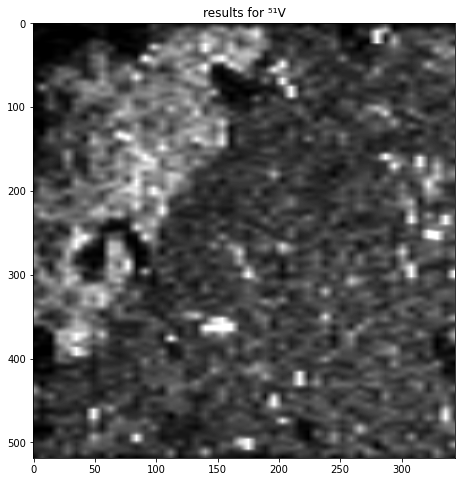

In [11]:
example_element = 'V51'
v51 = laser_data.show_single_image(element=example_element)

In [12]:
result_df = laser_data.process_phase_evaluation( icp_oes, icp_ms )
if isinstance(result_df, pd.DataFrame):
    display(HTML(result_df.to_html()))

7 of 10 elements in the ICP values are also present in the La-ICP-MS data
6 of 20 elements in the ICP values are also present in the La-ICP-MS data
Missing elements in the ICP calibration data: Rb
element Rb missing


,c_alite,c_err_alite,c_belite,c_err_belite,c_C4AF,c_err_C4AF
Na,0.320415,0.177149,0.500539,0.259472,0.403437,0.208925
Mg,1.56194,0.415045,1.06833,0.561535,1.90453,0.50853
Al,4.36798,2.91295,4.11791,3.21407,7.89109,4.19329
K,0.742163,1.41406,1.98525,2.11949,0.836218,1.14569
Ti,0.249623,0.0913834,0.25858,0.0899156,0.335847,0.127362
V,0.00844829,0.00319639,0.0154404,0.00582786,0.00904111,0.00411554
Cr,0.0097777,0.0103102,0.00559118,0.00996859,0.00883461,0.00862697
Mn,0.00045942,0.000251887,0.000374711,0.000234907,0.000692052,0.000385817
Zn,0.0279542,0.0333524,0.0214916,0.0346191,0.0330168,0.0303784
Rb,0,0,0,0,0,0


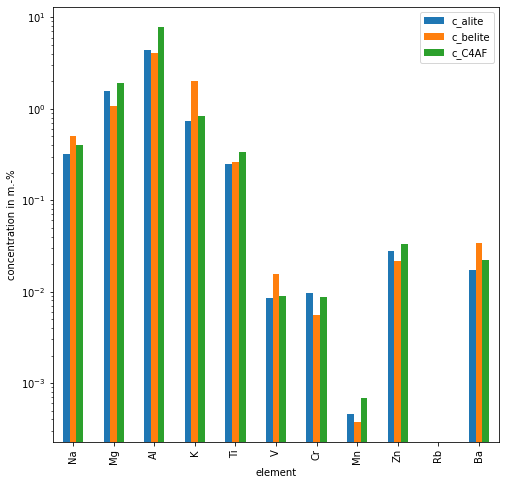

In [13]:
if isinstance(result_df, pd.DataFrame):
    col_names = []
    for phase_mask in laser_data.phases:
        col_names.append('c_' + phase_mask)

    ax = result_df[col_names].plot.bar(logy=True)
    ax.set(xlabel='element', ylabel='concentration in m.-%')
    plt.show()

x and y axis in µm
color scalebar in m.-% oxide


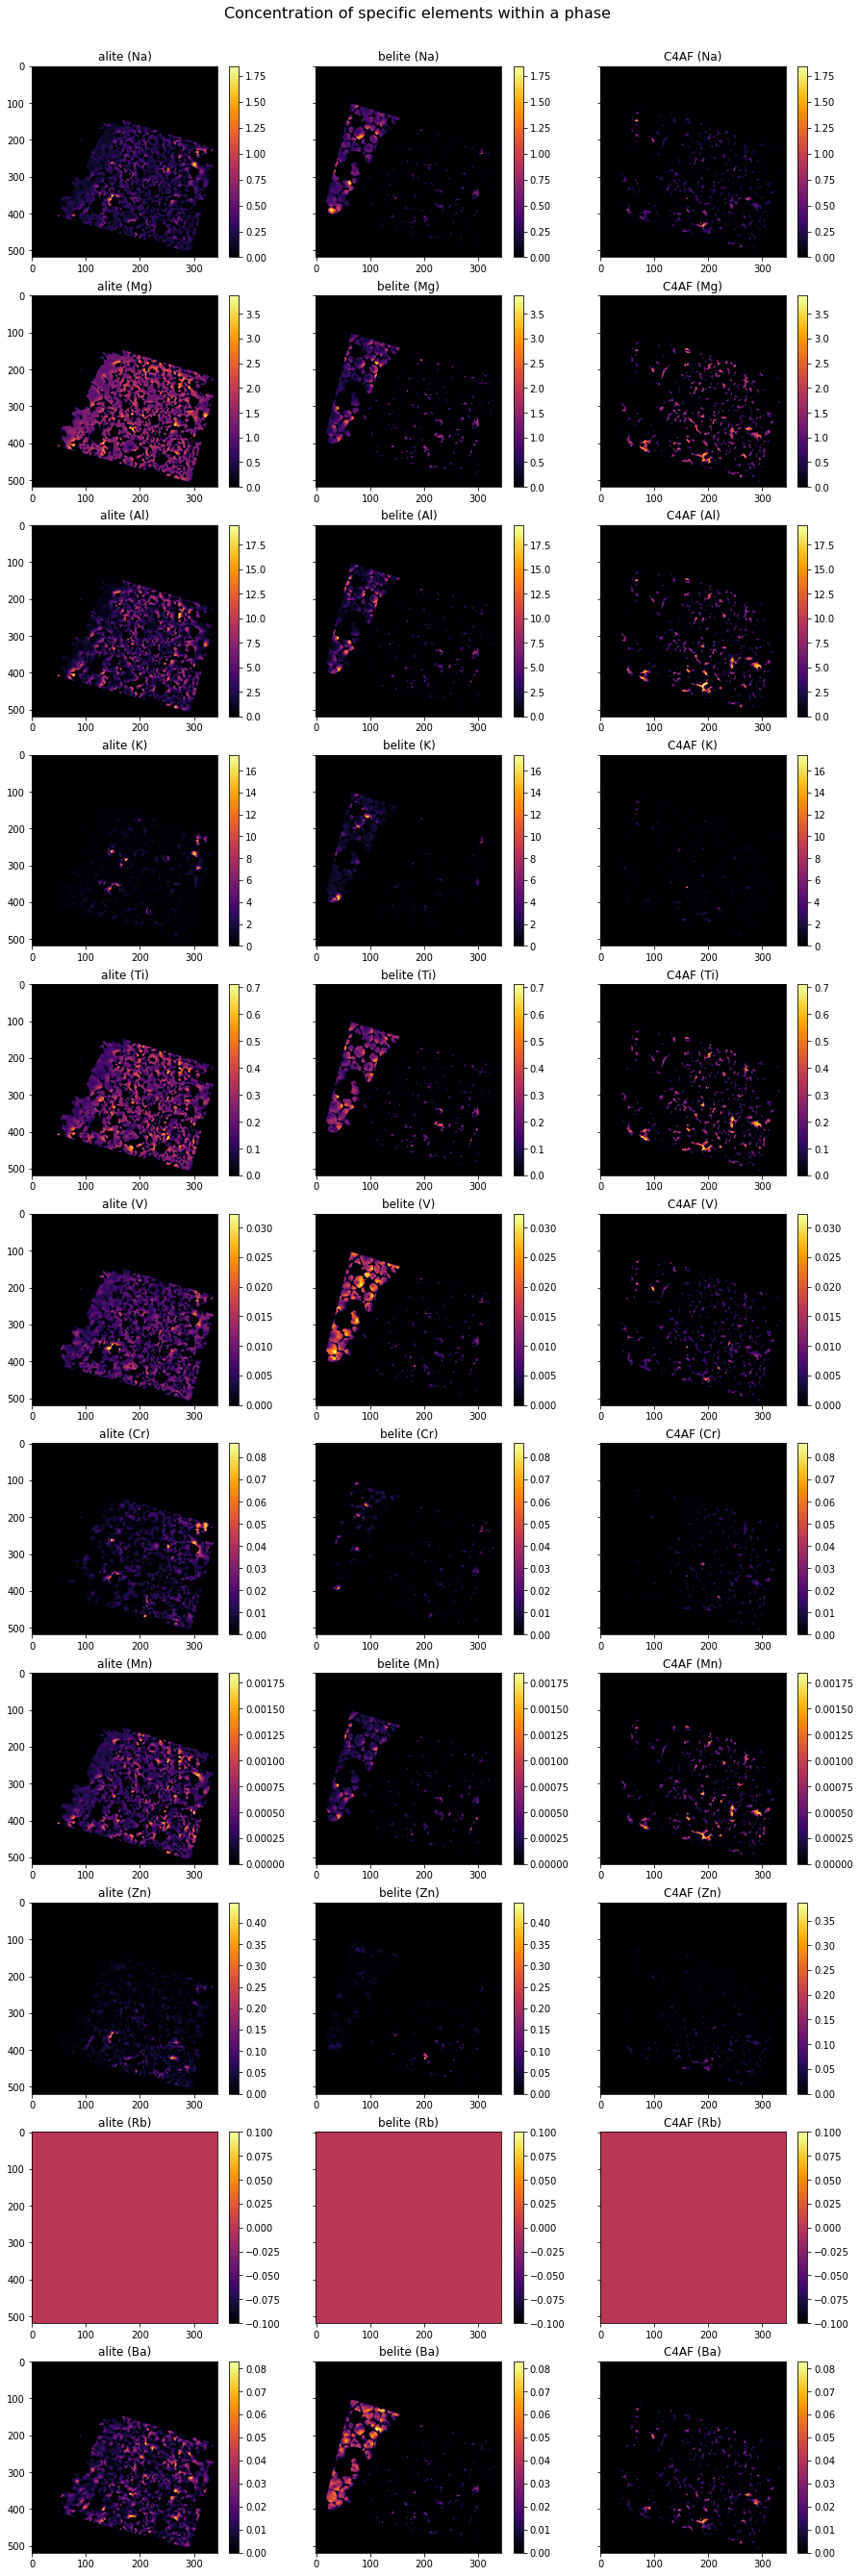

In [14]:
"""
def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    #Add a vertical color bar to an image plot.
    divider = make_axes_locatable(im.axes)
    width = axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)
"""
if laser_data.settings['do_phase_evaluation'] and os.path.isdir(laser_data.settings["phase_mask_path"]):
    n_isotopes = len(laser_data.np_images.keys())
    n_phases   = len(laser_data.phases)

    i = 0
    j = 0
    
    fig, ax = plt.subplots(n_isotopes, n_phases, figsize=(15, 43), sharey=True)
    fig.suptitle('Concentration of specific elements within a phase', fontsize=16)
    fig.subplots_adjust(top=0.96)
    for isotope in laser_data.np_images.keys():
        element = get_element_from_isotope( isotope )
        for phase_mask in laser_data.phases:
            mask_img_path = laser_data.settings["phase_mask_path"] + 'aligned' + phase_mask + '.png'
            if os.path.isfile( mask_img_path ):
                img = cv2.imread(mask_img_path, cv2.IMREAD_GRAYSCALE)
                # make shure the image is a mask
                _, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
                # make the threshold binary 
                mask = (thresh1/255).astype(int)

                # select pixel/values from the raw data
                selected = laser_data.cal_img_mpo[element] * 100 * mask

                im = ax[j, i].imshow(selected, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap='inferno', interpolation=None)
                ax[j, i].set_title('{} ({})'.format(phase_mask, element))
                #if i+1 == n_phases:
                plt.colorbar(im, ax=ax[j, i])
                #add_colorbar(im, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, pad_fraction=0.05)
                i += 1
        j += 1
        i = 0
    print("x and y axis in {}".format(laser_data.settings["unit"]))
    print("color scalebar in m.-% oxide")
    
    plt.show()
else:
    print('Phase evaluation skipped!')